In [1]:
import os
import xarray as xr
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
data_root = 'D:/OneDrive/Documents/Cours/4A/SFE/data/KH-5_ARGON_images'
products = []

for x in os.listdir(data_root):
    if os.path.isdir(os.path.join(data_root, x)):
        products.append(x)
        
products

['DS09034A007MC018', 'DS09058A024MC013']

In [3]:
for product in products:
    
    # finding files
    file = product + "_a.TIF"
    file = os.path.join(data_root, product, file).replace("\\", "/")
    
    # load and crop data
    image = rioxarray.open_rasterio(file)
    shy, shx = image.shape[1:]
    image_crop = image[:, 900:shy-2700, 1500:shx-1500]
    
    # flip axis and save
    image_crop_numpy = image_crop.to_numpy()[0, :, :]
    image_crop_numpy = np.flip(image_crop_numpy, axis=0)
    
    image_crop_fix = xr.DataArray(
        data=image_crop_numpy,
        dims=["y", "x"],
        coords={
            "y": image_crop.y,
            "x": image_crop.x,
            "spatial_ref": image_crop.spatial_ref,
        },
        attrs={
            "long_name": product + " cropped",
            "units": "none",
        },
    )
    
    image_crop_fix.rio.to_raster(file.replace(".TIF", "_crop.TIF"))

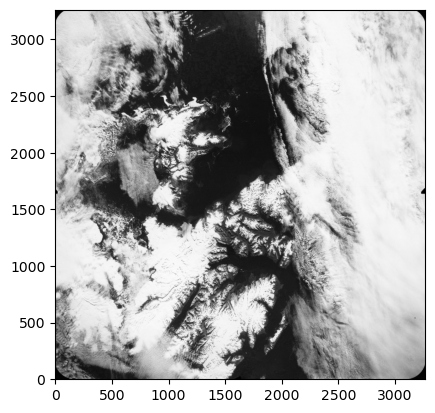

In [ ]:
image_rs = image_crop_numpy[0:shy:5, 0:shx:5]

fig, ax = plt.subplots()
shy, shx = image_crop_numpy.shape
ax.imshow(image_rs, cmap="gray", origin="lower")
# fig.savefig("image_kh.png", bbox_inches="tight")

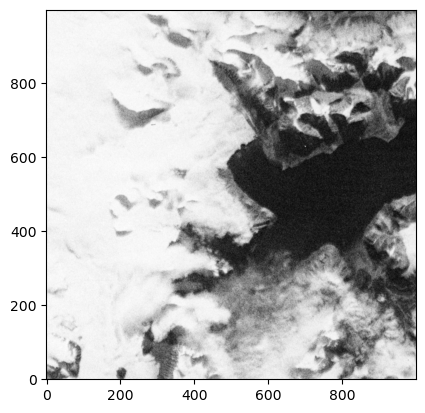

In [ ]:
fig, ax = plt.subplots()
shy, shx = image_crop_numpy.shape
ax.imshow(image_crop_numpy[900*5:1100*5, 1250*5:1450*5], cmap="gray", origin="lower")
# fig.savefig("image_kh_zoom_1.png", bbox_inches="tight")

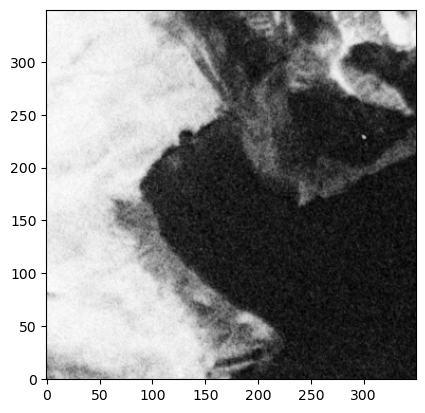

In [ ]:
fig, ax = plt.subplots()
shy, shx = image_crop_numpy.shape
ax.imshow(image_crop_numpy[980*5:1050*5, 1330*5:1400*5], cmap="gray", origin="lower")
# fig.savefig("image_kh_zoom_2.png", bbox_inches="tight")